# Tanmay Garg
## CS20BTECH11063
## Deep Learning Assignment 2

In [65]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import math
import torch.functional as F
import torch.nn as nn
from sklearn.utils import shuffle

# Q1
## Convolution Function

In [66]:
# Convolution Function implementation
def my_conv2d(input_image, filter_kernel, stride=1, padding=3, activation='relu'):
    # input_image: input image (batch_size, channels, height, width)
    # filter_kernel: filter kernel (output_channels, channels, kernel_height, kernel_width)
    # stride: stride
    # padding: padding
    # activation: activation function
    # return: output image

    # Pad the input image from scratch
    if padding > 0:
        # padding = padding//2
        image_pad = torch.zeros((input_image.shape[0], input_image.shape[1], input_image.shape[2] + 2*padding, input_image.shape[3] + 2*padding))
        # print("Shape of Padding: ", image_pad.shape)
        # applying padding to the input image
        image_pad[:, :, padding : -padding, padding : -padding] = input_image
        # print(input_image)
        # print(image_pad)
        input_image = image_pad
    
    # Calculating the output image size
    output_image = torch.zeros((input_image.shape[0], filter_kernel.shape[0], (input_image.shape[2] - filter_kernel.shape[2])//stride + 1, (input_image.shape[3] - filter_kernel.shape[3])//stride + 1))
    
    # Applying the filter kernel
    for i in range(output_image.shape[2]):
        for j in range(output_image.shape[3]):
            for k in range(filter_kernel.shape[0]):
                output_image[:, k, i, j] = torch.sum(input_image[:, :, i*stride : i*stride + filter_kernel.shape[2], j*stride : j*stride + filter_kernel.shape[3]] * filter_kernel[k, :, :, :], dim=(1, 2, 3))
        
    # Applying the activation function
    if activation == 'relu':
        output_image = torch.relu(output_image)
    elif activation == 'sigmoid':
        output_image = torch.sigmoid(output_image)
    elif activation == 'tanh':
        output_image = torch.tanh(output_image)
    elif activation == 'softmax':   
        output_image = torch.softmax(output_image, dim=1)
    elif activation == 'prelu':
        output_image = torch.prelu(output_image)
    elif activation == 'none':
        pass
    else:
        print("Invalid Activation Function")
    
    return output_image

In [67]:
# Testing the function and Cross Checking with PyTorch
test_input_img = torch.randn(1, 3, 32, 32)
test_filter_kernel = torch.randn(6, 3, 5, 5)
test_output_img1 = my_conv2d(test_input_img, test_filter_kernel, stride=1, padding=3, activation='relu')
print(test_output_img1.shape)

conv2d = nn.Conv2d(3, 6, 5, stride=1, padding=3, bias=False)
conv2d.weight = nn.Parameter(test_filter_kernel)
test_output_img2 = conv2d(test_input_img)
# apply relu activation
test_output_img2 = torch.relu(test_output_img2)
print(test_output_img2.shape)

# find difference between the two outputs
torch.allclose(test_output_img1, test_output_img2, rtol=1e-05, atol=1e-05)

torch.Size([1, 6, 34, 34])
torch.Size([1, 6, 34, 34])


True

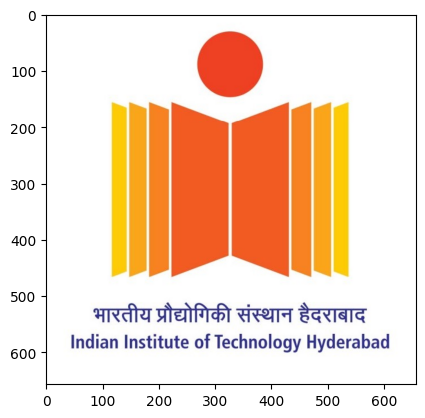

Shape of Image:  (657, 657, 3)
Shape of Kernel:  torch.Size([1, 1, 3, 3])
Shape of Output Image:  torch.Size([1, 1, 655, 655])
Shape of Output Image:  (655, 655, 1)


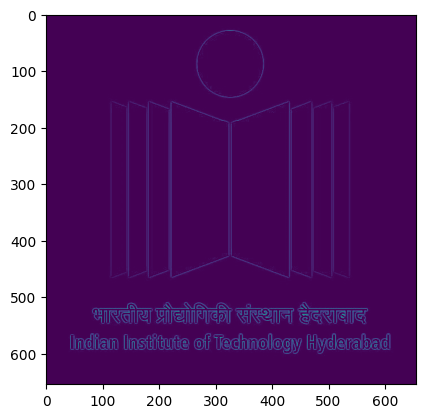

In [68]:
# Load the image and display it, display the filter kernel and display the output image
# Load the image
img = plt.imread('logo.jpg')
plt.imshow(img)
plt.show()
print("Shape of Image: ",img.shape)

# kernel filter
filter_kernel = np.array([[[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]]])
filter_kernel = torch.from_numpy(filter_kernel).float().unsqueeze(0)
print("Shape of Kernel: ",filter_kernel.shape)

# display the output image

img = torch.from_numpy(img).permute(2, 0, 1).unsqueeze(0).float()
# resize the image
# img = torch.nn.functional.interpolate(img, size=(32, 32), mode='bilinear')
# print(img.shape)

output_img = my_conv2d(img, filter_kernel, stride=1, padding=0, activation='relu')
print("Shape of Output Image: ",output_img.shape)

# plot the output image
output_img = output_img.squeeze(0).permute(1, 2, 0).detach().numpy()
print("Shape of Output Image: ",output_img.shape)
plt.imshow(output_img)
plt.show()

# Q2

In [69]:
# Pooling Function implementation
def pool(input_image, stride=1, pool_type='max'):
    # input_image: input image (batch_size, channels, height, width)
    # stride: stride
    # pool_type: pooling type
    # return: output image

    # Calculating the output image size

    input_image = np.array(input_image)
    output_image = np.zeros((input_image.shape[0], input_image.shape[1], (input_image.shape[2] - 2)//stride + 1, (input_image.shape[3] - 2)//stride + 1))
    
    # Applying the filter kernel
    for i in range(output_image.shape[2]):
        for j in range(output_image.shape[3]):
            if pool_type == 'max':
                output_image[:, :, i, j] = np.max(input_image[:, :, i*stride : i*stride + 2, j*stride : j*stride + 2], axis=(2, 3))
            elif pool_type == 'avg':
                output_image[:, :, i, j] = torch.mean(input_image[:, :, i*stride : i*stride + 2, j*stride : j*stride + 2], dim=(2, 3))
            else:
                print("Invalid Pooling Type")
    
    return torch.from_numpy(output_image).float()

In [70]:
# Testing the function and Cross Checking with PyTorch
test_input_img = torch.randn(1, 3, 32, 32)
test_output_img1 = pool(test_input_img, stride=1, pool_type='max')
print(test_output_img1.shape)

pool2d = nn.MaxPool2d(2, stride=1)
test_output_img2 = pool2d(test_input_img)
print(test_output_img2.shape)

# find difference between the two outputs
torch.allclose(test_output_img1, test_output_img2, rtol=1e-05, atol=1e-05)

torch.Size([1, 3, 31, 31])
torch.Size([1, 3, 31, 31])


True

Shape of Output Image:  torch.Size([1, 1, 327, 327])
Shape of Output Image:  (327, 327, 1)


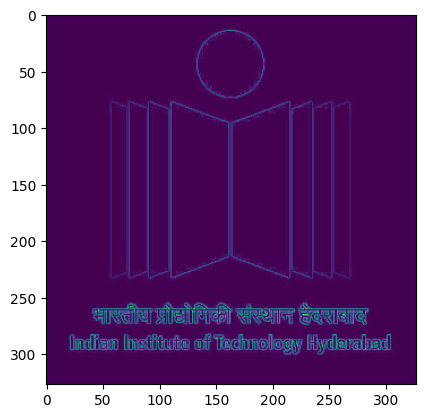

In [71]:
# Applying Pooling to the output image of convolution part
output_img = torch.from_numpy(output_img).permute(2, 0, 1).unsqueeze(0).float()
output_img = pool(output_img, stride=2, pool_type='max')
print("Shape of Output Image: ",output_img.shape)

# plot the output image
output_img = output_img.squeeze(0).permute(1, 2, 0).detach().numpy()
print("Shape of Output Image: ",output_img.shape)
plt.imshow(output_img)
plt.show()

# Q3

In [72]:
# Implementing Convolution Layer Function
def conv_layer(input_image, num_filters, kernel_dim, stride=1, padding=0, activation='relu'):
    # input_image: input image (batch_size, channels, height, width)
    # num_filters: number of filters
    # kernel_dim: kernel dimension
    # stride: stride
    # padding: padding
    # activation: activation function
    # return: output image

    # Initializing the filter kernel
    filter_kernel = torch.randn(num_filters, input_image.shape[1], kernel_dim, kernel_dim)
    
    # Applying the convolution function
    output_image = my_conv2d(input_image, filter_kernel, stride, padding, activation)
    
    return output_image

# Q4

In [ ]:
# Implementing Pooling Layer Function
def pool_layer(input_image, stride=1, pool_type='max'):
    # input_image: input image (batch_size, channels, height, width)
    # stride: stride
    # pool_type: pooling type
    # return: output image

    # Applying the pooling function
    if pool_type == 'global avg':
        output_image = torch.mean(input_image, dim=(2, 3))
    else:
        output_image = pool(input_image, stride, pool_type)
    
    return output_image

# Q5

In [ ]:
# Implement Flatten Function
def flatten(input_image, output_shape):
    # input_image: input image (batch_size, channels, height, width)
    # output_shape: output shape
    # return: output image

    B, C, H, W = input_image.shape
    flatten_shape = C * H * W
    
    flatten_weight = torch.randn(flatten_shape, output_shape)
    output_img = torch.matmul(input_image.view(B, flatten_shape), flatten_weight)

    return output_img

# Q6

In [ ]:
# Multi Layer Perceptron Function
def mlp(input_image, hidden_size, output_shape, activation='relu', softmax=False):
    # input_image: input image (batch_size, channels, height, width)
    # hidden_size: hidden size
    # output_shape: output shape
    # activation: activation function
    # return: output image

    input_layer = input_image
    
    for size in hidden_size:
        weight = torch.randn(input_layer.shape[1], size)
        bias = torch.randn(size)
        
        hidden_layer_output = torch.matmul(input_layer, weight) + bias
    
        if activation == 'relu':
            input_layer = torch.relu(hidden_layer_output)
        elif activation == 'sigmoid':
            input_layer = torch.sigmoid(hidden_layer_output)
        elif activation == 'tanh':
            input_layer = torch.tanh(hidden_layer_output)
        else:
            print("Invalid Activation Function")
    
    weight = torch.randn(input_layer.shape[1], output_shape)
    bias = torch.randn(output_shape)

    output_img = torch.matmul(input_layer, weight) + bias
    if softmax:
        output_img = torch.softmax(output_img, dim=1)

    return output_img